<BarContainer object of 192 artists>

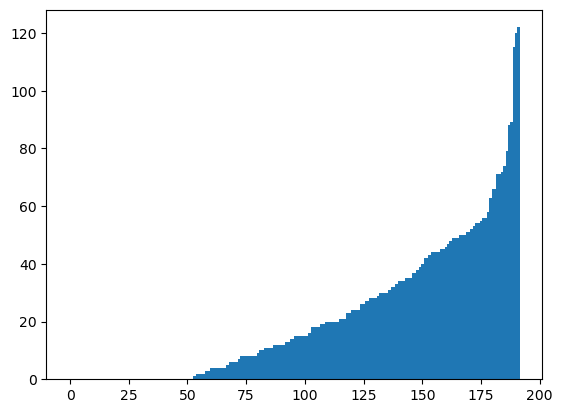

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

behavior = pd.read_csv("../data/behavior_PassQC_CBS_ALL.tsv", sep='\t')
spia_c = behavior.filter(regex="SPIA").columns
coper_c = spia_c[4:13]
cogdis_c = spia_c[0:8]
coper_df = behavior.copy()
coper_df[coper_df[coper_c] < 3] = 0
coper_df[coper_df[coper_c] >= 3] = 1
behavior['COPER_sum'] = coper_df[coper_c].sum(axis=1)
behavior['COPER'] = behavior['COPER_sum'] > 0
cogdis_df = behavior.copy()
cogdis_df[cogdis_df[cogdis_c] < 3] = 0
cogdis_df[cogdis_df[cogdis_c] >= 3] = 1
behavior['COGDIS_sum'] = cogdis_df[cogdis_c].sum(axis=1)
behavior['COGDIS'] = behavior['COGDIS_sum'] > 1

#update with actual CHRP diagnoses, FEP have none so must used calculated. Control and CHRN are not diagnosed with either
behavior = behavior.replace([True,False], ['yes','no'])
chrp_diag = pd.read_csv('../data/SPIA_diag.tsv',sep='\t').set_index('participant_id')
behavior = behavior.set_index('participant_id')
#behavior.update(chrp_diag)
behavior = behavior.reset_index()
behavior['COPER'].value_counts(sort=False)
#behavior[(behavior['Group']=='Clinical High Risk - Negative')]

# behavior[(behavior['Group']=='Clinical High Risk - Negative') & (behavior['COGDIS']=='yes')]
comp_cols = ['CAARMS_UTC_severity','CAARMS_NBI_severity', 'CAARMS_PA_severity', 'CAARMS_DS_severity']
behavior['CAARMS_Composite'] = behavior[comp_cols].sum(axis=1)
behavior = behavior.sort_values(by=['CAARMS_Composite'])
caarms_comp = behavior['CAARMS_Composite'].to_numpy()
plt.bar(np.arange(len(caarms_comp)),height=caarms_comp.tolist(),width=1)

In [6]:
import numpy as np

t = np.arange(0.8,6.8*2, 2)

In [8]:
t2 = np.empty_like(t).fill(5)

In [21]:
a = np.empty_like(t)
a.fill(5)
a.flatten().astyp

array([5., 5., 5., 5., 5., 5., 5.])